## Peer-graded Assignment: Анализ данных в задаче кредитного скоринга

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

import scipy

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

- LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
- SEX: пол клиента (1 = мужской, 2 = женский )
- EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
- MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
- AGE: возраст в годах
- PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. - Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
- BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
- PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
- default - индикатор невозврата денежных средств

In [2]:
credit = pd.read_csv('credit_card_default_analysis.csv')
credit.shape

(30000, 25)

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [4]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 1. Размер кредитного лимита (LIMIT_BAL):
В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения?

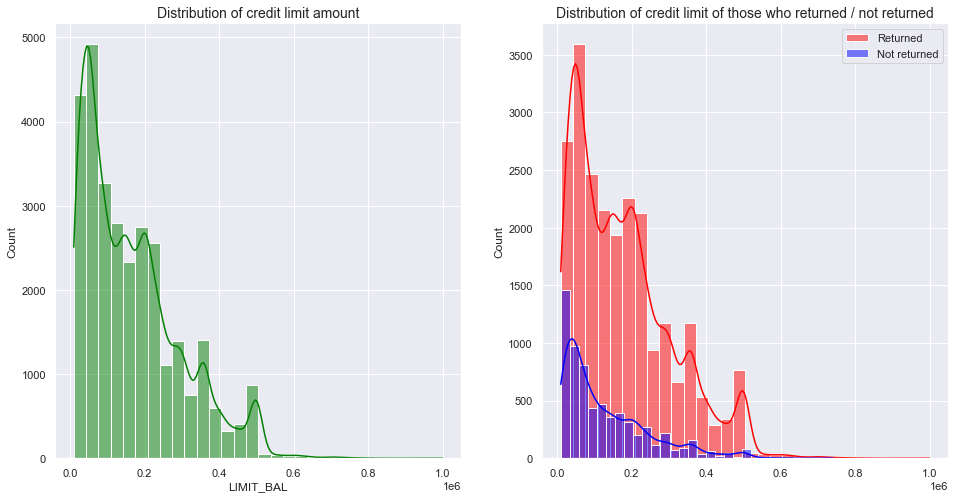

In [6]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(data=credit, x='LIMIT_BAL', bins=30, kde=True, color='green')
plt.title('Distribution of credit limit amount', fontsize=14)

limits_returned = credit[credit.default == 0].LIMIT_BAL.values
limits_nonreturned = credit[credit.default == 1].LIMIT_BAL.values

plt.subplot(1,2,2)
sns.histplot(limits_returned, bins=30, kde=True, color='red', label='Returned')
sns.histplot(limits_nonreturned, bins=30, kde=True, color='blue', label='Not returned')
plt.title('Distribution of credit limit of those who returned / not returned', fontsize=14)
plt.legend()
plt.show()

По графикам распределений видно, что клиенты банка в основном не возвращают маленькие займы, с ростом же суммы люди обычно погашают долг. Наиболее популярные суммы займов - до 100000.

#### Проверим гипотезы: 
- a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки:

Построим доверительный интервал для разности медиан двух выборок с помощью бутстреп-подвыборок:

$H_0\colon med_1(X) = med_2(X)$

$H_1\colon med_1(X) \neq med_2(X)$

In [7]:
def get_bootstrap_samples(data, n_samples):
    
    """ Returns 2D array of n_samples of 1D bootstrap samples arrays"""
    
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    
    return samples

def conf_int_bootstrep(sample, alpha=0.05):
    left_boundary = np.percentile(sample, 100 * alpha / 2.)
    right_boundary = np.percentile(sample, 100 * (1 - alpha / 2.))
    return (left_boundary, right_boundary)

limits_returned_samples = get_bootstrap_samples(limits_returned, 500)
limits_nonreturned_samples = get_bootstrap_samples(limits_nonreturned, 500)

limits_returned_medians = np.array([np.median(sample) for sample in limits_returned_samples])
limits_nonreturned_medians = np.array([np.median(sample) for sample in limits_nonreturned_samples])

print(f'95% confidence interval for LIMIT_BAL median difference: {conf_int_bootstrep(limits_returned_medians - limits_nonreturned_medians)}')
print(f'95% confidence interval for LIMIT_BAL median where default = 0: {conf_int_bootstrep(limits_returned_medians)}')
print(f'95% confidence interval for LIMIT_BAL median where default = 1: {conf_int_bootstrep(limits_nonreturned_medians)}')

95% confidence interval for LIMIT_BAL median difference: (60000.0, 70000.0)
95% confidence interval for LIMIT_BAL median where default = 0: (150000.0, 150000.0)
95% confidence interval for LIMIT_BAL median where default = 1: (80000.0, 90000.0)


<b>Вывод</b>: Доверительный интервал для разности не содержит ноль, и сильно сдвинут. Как видно из интервальной оценки, медианы двух выборок не равны. Медианное значение размера займа у тех, кто не возвращают кредит, меньше.


- b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних:

#### Будем использовать непараметрический - перестановочный критерий проверки равенства двух распределений и двустороннюю альтернативу:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$ (распределения одинаковы)

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$ (распределения неодинаковы, отличаются на сдвиг)

In [8]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)


def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]


def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr


def permutation_test(sample, mean, max_permutations = None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [9]:
np.random.seed(0)

p_value = permutation_test(limits_returned, limits_nonreturned, max_permutations=500)
print(f'Calculated p-value for Permutation test with 500 permutations: {p_value:.4f}')

p_value = permutation_test(limits_returned, limits_nonreturned, max_permutations=1000)
print(f'Calculated p-value for Permutation test with 1000 permutations: {p_value:.4f}')

Calculated p-value for Permutation test with 500 permutations: 0.0020
Calculated p-value for Permutation test with 1000 permutations: 0.0010


<b>Вывод</b>: p-value получается довольно малым и равным около 0.001 при проведении теста с 1000 перестановками, и нулевая гипотеза $H_0$, о том, что распределения одинаковы отвергается на уровне значимости $\alpha=0.05$.
Полученный результат является статистически значимым с практической точки зрения, потому что разница в значениях медиан LIMIT_BAL двух выборок большая (60000-70000).

### 2. Пол (SEX): 
Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия) 

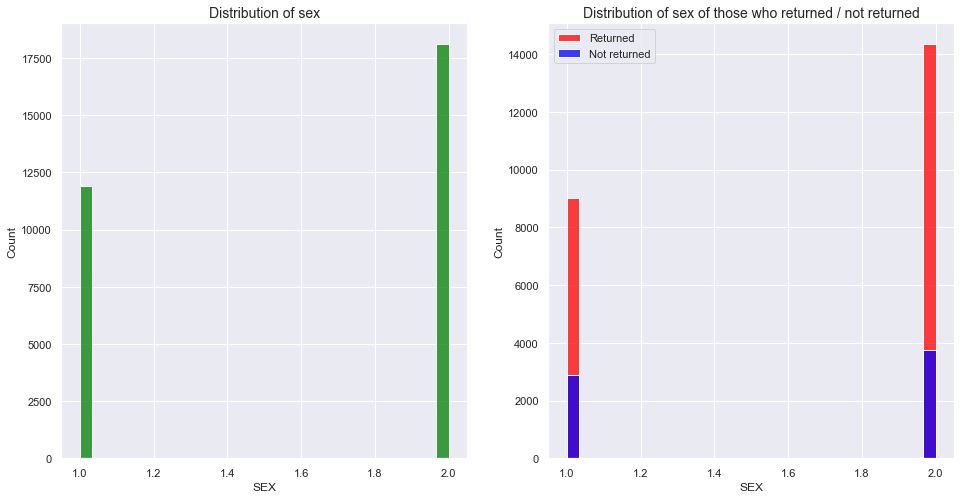

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(data=credit, x='SEX', bins=30, color='green')
plt.title('Distribution of sex', fontsize=14)

sex_returned = credit[credit.default == 0].SEX
sex_nonreturned = credit[credit.default == 1].SEX

plt.subplot(1,2,2)
sns.histplot(sex_returned, bins=30, color='red', label='Returned')
sns.histplot(sex_nonreturned, bins=30, color='blue', label='Not returned')
plt.title('Distribution of sex of those who returned / not returned', fontsize=14)
plt.legend()

plt.show()

В выборке больше женщин-заемщиков, чем мужчин. Судя по гистограммам, женщины больше склонны к невозврату.

#### Построим доверительный интервал для разности долей в двух независимых выборках при помощи Z-критерия для доли, а также проверим гипотезу, о том отличается ли гендерный состав группы людей вернувших и не вернувших кредит :
$H_0$: гендерный состав в двух выборках неразличим

$H_1$: гендерный состав в двух выборках различим

In [28]:
sex_returned = sex_returned.apply(lambda x: 0 if x==1 else 1)
sex_nonreturned = sex_nonreturned.apply(lambda x: 0 if x==1 else 1)

print(f'Proportion of women in default=0 sample: {sum(sex_returned) / sex_returned.shape[0]}')
print(f'Proportion of women in default=1 sample: {sum(sex_nonreturned) / sex_nonreturned.shape[0]}')

Proportion of women in default=0 sample: 0.6141499743194658
Proportion of women in default=1 sample: 0.5670584689572031


In [12]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ n1 + p2 * (1 - p2)/ n2)
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [13]:
print(f"95% confidence interval for a difference between proportions: {proportions_diff_confint_ind(sex_returned, sex_nonreturned)}")
print(f"p-value: {proportions_diff_z_test(proportions_diff_z_stat_ind(sex_returned, sex_nonreturned))}")

95% confidence interval for a difference between proportions: (0.03363493274962867, 0.060548077974896725)
p-value: 4.472866521609831e-12


<b>Вывод</b>: Доверительный интервал для разности долей не содержит ноль, значит интервалы не пересекаются, и, скорее всего, есть разница в гендерном составе двух выборок (95% дов. интервал разности - [0.03, 0.06]). Гипотеза $H_0$ о неразличимости гендерного состава двух выборок отвергается в пользу альтернативы на уровне значимости 0.05. Данный результат явлется статистически значимым ($p\approx0$) с практической точки зрения.


### 3. Образование (EDUCATION):
Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ? 

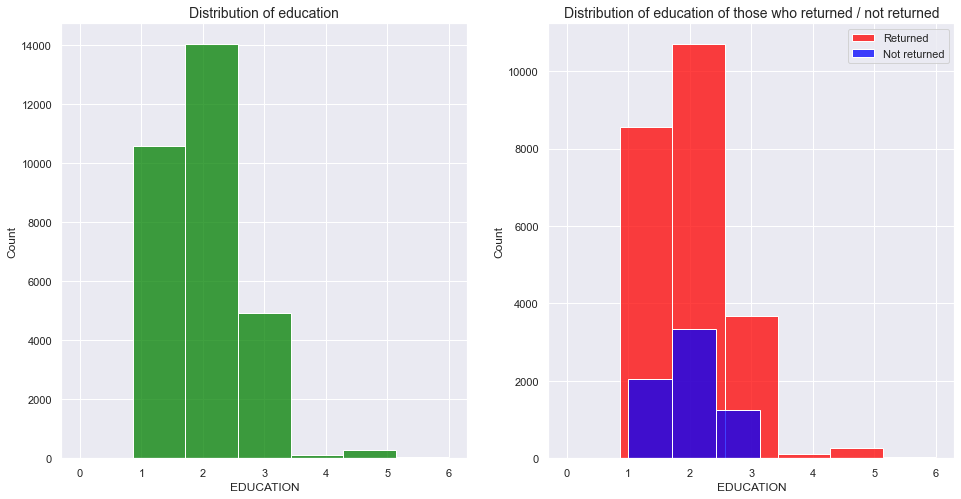

In [14]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(data=credit, x='EDUCATION', bins=7, color='green')
plt.title('Distribution of education', fontsize=14)

education_returned = credit[credit.default == 0].EDUCATION
education_nonreturned = credit[credit.default == 1].EDUCATION

plt.subplot(1,2,2)
sns.histplot(education_returned, bins=7, color='red', label='Returned')
sns.histplot(education_nonreturned, bins=7, color='blue', label='Not returned')
plt.title('Distribution of education of those who returned / not returned', fontsize=14)
plt.legend()

plt.show()

Судя по данным, чаще всего кредит берут бакалавры, также бакалавры больше склонны к невозврату долга.

#### Мы хотим проверить гипотезу о том, что образование не влияет на то, вернет ли человек долг

Для этого мы воспользуемся критерием хи-квадрат. Построим таблицу сопряженности между двумя переменными <b>EDUCATION</b> и <b>default</b>, и применим критерий хи-квадрат: 

$H_0\colon$ образование не влияет на то, вернет ли человек долг (равномерное распределение)

$H_1\colon$ образование влияет на то, вернет ли человек долг

In [15]:
contingency_table = pd.crosstab(credit.default, credit.EDUCATION)
contingency_table

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


In [16]:
print('Chi2 test without Yates correction:')
print(f'p-value: {scipy.stats.chi2_contingency(contingency_table, correction=False)[1]}')

Chi2 test without Yates correction:
p-value: 1.2332626245415605e-32


In [17]:
print('Chi2 test with Yates correction:')
print(f'p-value: {scipy.stats.chi2_contingency(contingency_table, correction=True)[1]}')

Chi2 test with Yates correction:
p-value: 1.2332626245415605e-32


In [18]:
education_cat = np.unique(credit.EDUCATION.values)

p_values = []

for index_1, cat_1 in enumerate(education_cat):
    for index_2, cat_2 in enumerate(education_cat):
        
        if index_1 >= index_2:
            continue          

        oddsratio, p = scipy.stats.fisher_exact(contingency_table.iloc[:, [index_1, index_2]])
        p_values.append(p)

print(f'Number of p-values < 0.05 calculated with Fisher exact test: {sum([p < 0.05 for p in p_values])}')

Number of p-values < 0.05 calculated with Fisher exact test: 12


<b>Вывод</b>: Гипотеза $H_0$ о том, что образование не влияет на то, вернет ли человек долг отвергается на уровне значимости $\alpha=0.05$.

Результат имеет практическую значимость для скоринговой модели, так как доли возврата статистически значимо отличаются для различного уровня образования.

### 4. Семейное положение (MARRIAGE): 

Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

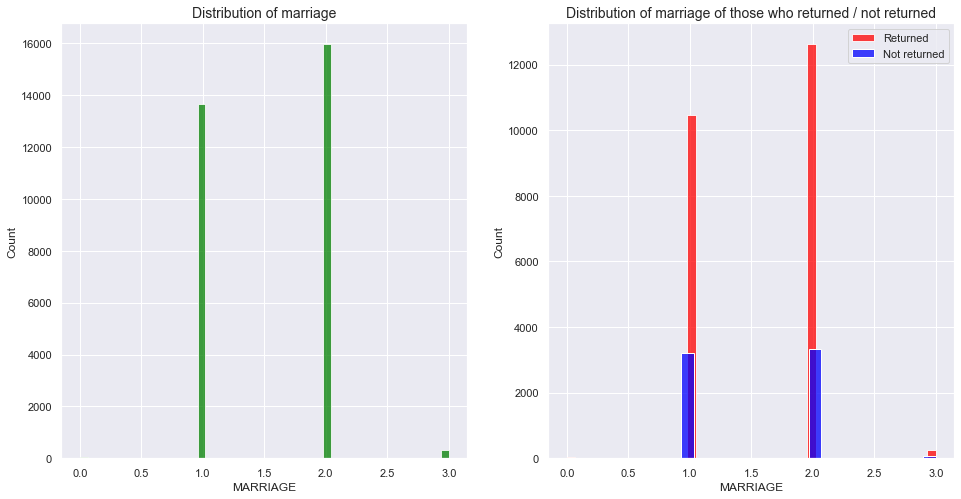

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(data=credit, x='MARRIAGE', color='green')
plt.title('Distribution of marriage', fontsize=14)

marriage_returned = credit[credit.default == 0].MARRIAGE
marriage_nonreturned = credit[credit.default == 1].MARRIAGE

plt.subplot(1,2,2)
sns.histplot(marriage_returned, color='red', label='Returned')
sns.histplot(marriage_nonreturned, color='blue', label='Not returned')
plt.title('Distribution of marriage of those who returned / not returned', fontsize=14)
plt.legend()

plt.show()

Доли невозвратов кредитов среди женатых и холостых немного различаются 

Так как переменная MARRIAGE является категориальной, а целевая переменная default - бинарной, то невозможно посчитать значения коэффициентов корреляции Пирсона, Спирмена или Мэтьюса. Необходимо использовать <b>коэффициент $\phi_C$ Крамера</b> для определения связи между <b>MARRIAGE</b> и <b>default</b>. 

Начнем с создания таблицы сопряженности между двумя переменными:

In [20]:
contingency_table = pd.crosstab(credit.default, credit.MARRIAGE)
contingency_table

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


In [21]:
def cramer_coef(contingency_table):
    chi_2_stat = scipy.stats.chi2_contingency(contingency_table)[0]
    n = np.sum(contingency_table)
    return np.sqrt(chi_2_stat / (n * (min(contingency_table.shape) - 1)))

print(f'Cramer V coefficient value: {cramer_coef(contingency_table.values):.4f}')

Cramer V coefficient value: 0.0345


<b>Вывод</b>: коэффициент $\phi_C$ <b>Крамера</b> принимает значение $0.0345$, что практически означает, что какая-либо взаимосвязь между семейным положением и возвратом кредита отсутствует. Данный результат практически значим, так как исходя из выборочных данных, можно сделать вывод, что две выборки статистически неразличимы, и нет особой разницы кто приходит за кредитом - женатый человек или холостой.

### 5. Возраст (AGE): 
Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

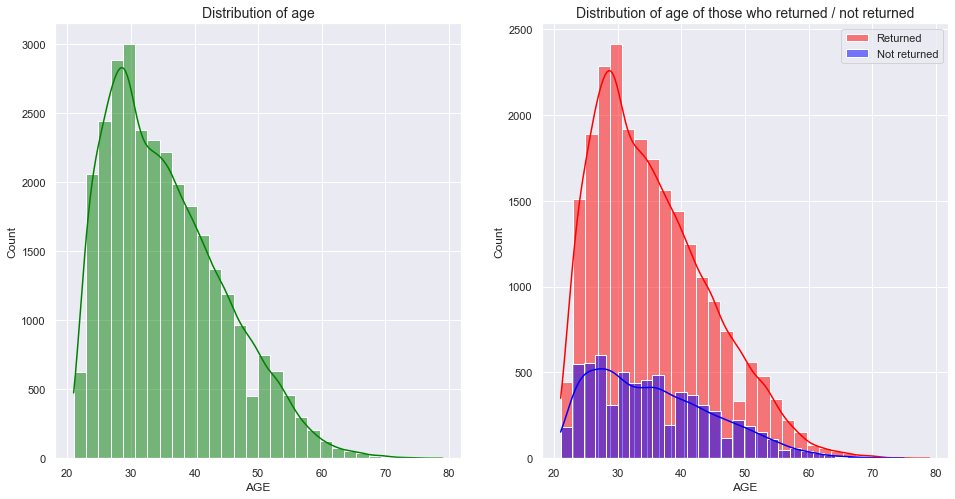

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(data=credit, x='AGE', bins=30, kde=True, color='green')
plt.title('Distribution of age', fontsize=14)

age_returned = credit[credit.default == 0].AGE
age_nonreturned = credit[credit.default == 1].AGE

plt.subplot(1,2,2)
sns.histplot(age_returned, color='red', bins=30, kde=True, label='Returned')
sns.histplot(age_nonreturned, color='blue', bins=30, kde=True, label='Not returned')
plt.title('Distribution of age of those who returned / not returned', fontsize=14)
plt.legend()

plt.show()

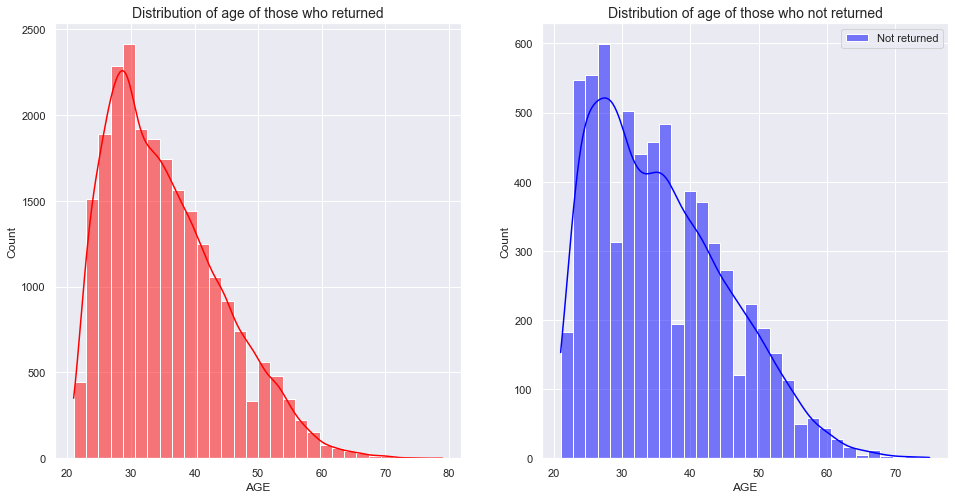

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(age_returned, color='red', bins=30, kde=True, label='Returned')
plt.title('Distribution of age of those who returned', fontsize=14)
plt.subplot(1,2,2)
sns.histplot(age_nonreturned, color='blue', bins=30, kde=True, label='Not returned')
plt.title('Distribution of age of those who not returned', fontsize=14)
plt.legend()
plt.show()

На глаз, нет существенного отличия между распределениями возрастов, кто вернул кредиты, и тех кто не вернут. Молодые люди более склоны к займам.

$H_0\colon med_1(X) = med_2(X)$

$H_1\colon med_1(X) \neq med_2(X)$

In [24]:
age_returned_samples = get_bootstrap_samples(age_returned.values, 500)
age_nonreturned_samples = get_bootstrap_samples(age_nonreturned.values, 500)

age_returned_medians = np.array([np.median(sample) for sample in age_returned_samples])
age_nonreturned_medians = np.array([np.median(sample) for sample in age_nonreturned_samples])

print(f'95% confidence interval for AGE median difference: {conf_int_bootstrep(age_returned_medians - age_nonreturned_medians)}')
print(f'95% confidence interval for AGE median where default = 0: {conf_int_bootstrep(age_returned_medians)}')
print(f'95% confidence interval for AGE median where default = 1: {conf_int_bootstrep(age_nonreturned_medians)}')

95% confidence interval for AGE median difference: (-1.0, 0.0)
95% confidence interval for AGE median where default = 0: (34.0, 34.0)
95% confidence interval for AGE median where default = 1: (34.0, 35.0)


#### Будем использовать непараметрический - перестановочный критерий проверки равенства двух распределений и двустороннюю альтернативу:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$ (распределения одинаковы)

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$ (распределения неодинаковы, отличаются на сдвиг)

In [25]:
np.random.seed(0)

p_value = permutation_test(age_returned, age_nonreturned, max_permutations=500)
print(f'Calculated p-value for Permutation test with 500 permutations: {p_value:.4f}')

p_value = permutation_test(age_returned, age_nonreturned, max_permutations=1000)
print(f'Calculated p-value for Permutation test with 1000 permutations: {p_value:.4f}')

Calculated p-value for Permutation test with 500 permutations: 0.0180
Calculated p-value for Permutation test with 1000 permutations: 0.0180


In [26]:
scipy.stats.mannwhitneyu(age_returned, age_nonreturned, alternative='two-sided')

MannwhitneyuResult(statistic=76966879.5, pvalue=0.3725035434898616)

<b>Вывод</b>: Критерий перестановок с p-value $\approx0.02$ отвергает нулевую гипотезу $H_0$, о том, что распределения одинаковы.

Ранговый же критерий и построеные доверительные интервалы для медиан говорят, что стоит принять нулевую гипотезу $H_0$, о том, что две выборки неразличимы. В этом случае можно утдверждать, что возраст не влияет на то, вернет ли человек кредит.

### Review criteria

- Выполнение каждого пункта задания должно начинаться с графика с данными, которые вы собираетесь анализировать. Еще лучше, если вы разложите графики анализируемого фактора по переменной (default), на которую хотите изучить влияние этого фактора, и проинтерпретируете отличия в полученных распределениях.
- При использовании статистических критериев необходимо убедиться в том, что условия их применимости выполняются. Например, если вы видите, что данные бинарные, то не нужно применять критерий Стьюдента.
-  При каждом использовании любого критерия необходимо указать, какая проверяется гипотеза, против какой альтернативы, чему равен достигаемый уровень значимости, принимается или отвергается нулевая гипотеза на уровне значимости 0.05. Если задача позволяет, нужно оценить размер эффекта и предположить, имеет ли этот результат практическую значимость.
- Выполненное задание необходимо представить в ipython-ноутбука.